In [1]:
import pandas as pd
import seaborn as sns
import scipy

Руководство компании обратило внимание на то, что сотрудники старше 35 лет болеют чаще, чем более молодые сотрудники. Кроме этого, среди мужчин количество пропусков рабочих дней в связи с больничным выше, чем среди женщин. В связи с этой ситуацией, руководство организации планирует ввести дополнительные медицинские осмотры среди групп риска.<br>

`Необходимо проверить несколько гипотез:`
1)	Мужчины пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще женщин.<br>
2)	Работники старше 35 лет (age) пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще своих более молодых коллег.



In [2]:
df = pd.read_csv("./Статистика.csv" , encoding = 'cp1251')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Количество больничных дней  237 non-null    int64 
 1   Возраст                     237 non-null    int64 
 2   Пол                         237 non-null    object
dtypes: int64(2), object(1)
memory usage: 5.7+ KB


In [4]:
df.head()

,Количество больничных дней,Возраст,Пол
0,5,39,Ж
1,4,54,М
2,4,26,М
3,5,42,М
4,4,29,М


In [21]:
df.Возраст.min()

23

### 1.Мужчины пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще женщин.

In [5]:
df_1 = df.loc[df['Количество больничных дней'] > 2]

Выборки с мужчинами и женщинами

In [6]:
males = df_1.loc[df_1['Пол'] == 'М', 'Количество больничных дней']
females = df_1.loc[df_1['Пол'] == 'Ж', 'Количество больничных дней']

#### Шапиро-Вилко тест

Тест на проверку нормальности распределения .


`H0` : нулевая гепотиза: выборка имеет нормальное распределение.\
`H1` : альтернативная гипотеза: выборка не имеет нормального распределения.

#### Для мужчин

In [7]:
stat, p = scipy.stats.shapiro(males)

print(f'stat={stat:.3f}, p={p:.10f}')
if p > 0.05:
    print('Нет досточных оснований, чтобы отклонить H0')
else:
    print('Есть достаточно оснований, чтобы отклонить H0, приманимаем H1.')

stat=0.816, p=0.0000000075
Есть достаточно оснований, чтобы отклонить H0, приманимаем H1.


<AxesSubplot: >

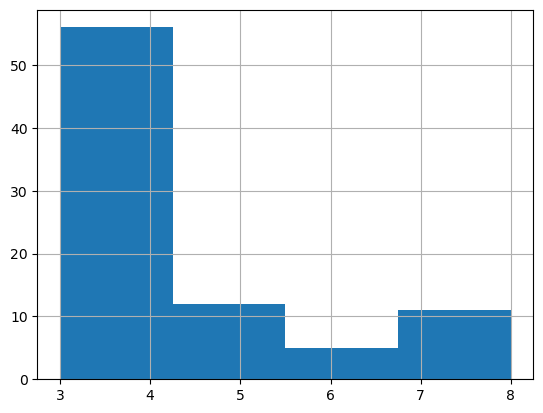

In [19]:
males.hist(bins = 4)

#### Для женщин

In [9]:
stat, p = scipy.stats.shapiro(females)

print(f'stat={stat:.3f}, p={p:.10f}')
if p > 0.05:
    print('Нет досточных оснований, чтобы отклонить H0')
else:
    print('Есть достаточно оснований, чтобы отклонить H0, приманимаем H1.')

stat=0.841, p=0.0000005731
Есть достаточно оснований, чтобы отклонить H0, приманимаем H1.


<AxesSubplot: >

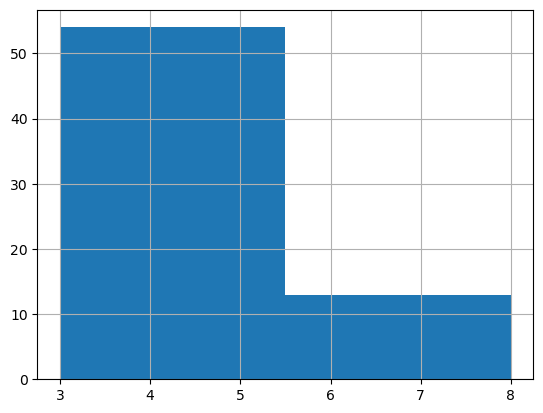

In [10]:
females.hist(bins = 2)

#### Тест Манна-Витни для двух независимых выборок.

Тест сравнения двух выборок .


`H0` : нулевая гепотиза: выборки не имеют значимых различий.\
`H1` : альтернативная гипотеза: выборки  имеют значимые различия.

In [11]:
stat, p = scipy.stats.mannwhitneyu(females, males)
print(f'stat={stat:.3f}, p={p:.10f}')
if p > 0.05:
    print('Нет досточных оснований, чтобы отклонить H0')
else:
    print('Есть достаточно оснований, чтобы отклонить H0, приманимаем H1.')

stat=2799.000, p=0.9548173131
Нет досточных оснований, чтобы отклонить H0


`Вывод: Мужчины не пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще женщин.`

### 2.Работники старше 35 лет (age) пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще своих более молодых коллег.

In [12]:
above_35 = df_1.loc[df_1['Возраст'] > 35, 'Количество больничных дней']
below_35 = df_1.loc[df_1['Возраст'] <= 35, 'Количество больничных дней']

#### Шапиро-Вилко тест

Тест на проверку нормальности распределения .\
`H0` : нулевая гепотиза: выборка имеет нормальное распределение.\
`H1` : альтернативная гипотеза: выборка не имеет нормального распределения.

#### Младше 35 лет включительно.

In [13]:
stat, p = scipy.stats.shapiro(below_35)

print(f'stat={stat:.3f}, p={p:.10f}')
if p > 0.05:
    print('Нет досточных оснований, чтобы отклонить H0')
else:
    print('Есть достаточно оснований, чтобы отклонить H0, приманимаем H1.')

stat=0.826, p=0.0000553038
Есть достаточно оснований, чтобы отклонить H0, приманимаем H1.


<AxesSubplot: >

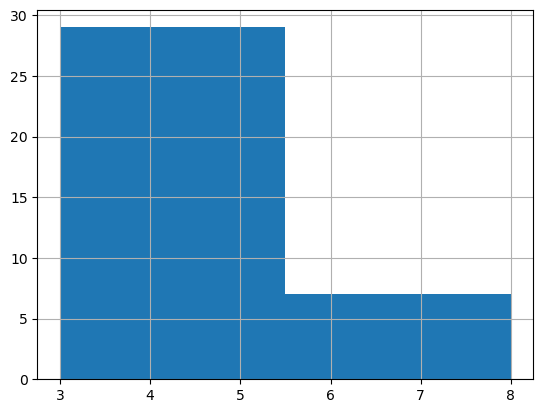

In [14]:
below_35.hist(bins = 2)

<AxesSubplot: >

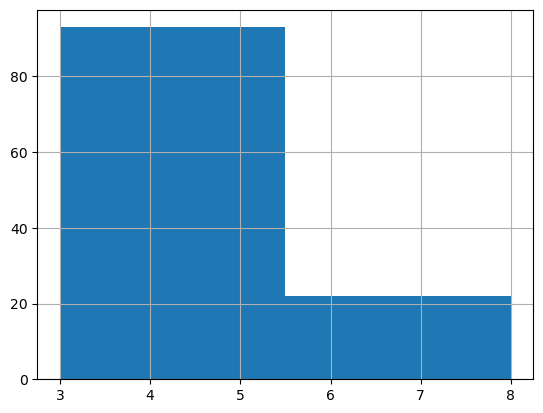

In [15]:
above_35.hist(bins = 2)

#### Старше 35 лет .

In [16]:
stat, p = scipy.stats.shapiro(above_35)

print(f'stat={stat:.3f}, p={p:.10f}')
if p > 0.05:
    print('Нет досточных оснований, чтобы отклонить H0')
else:
    print('Есть достаточно оснований, чтобы отклонить H0, приманимаем H1.')

stat=0.826, p=0.0000000002
Есть достаточно оснований, чтобы отклонить H0, приманимаем H1.


#### Тест Манна-Витни для двух независимых выборок.

Тест сравнения двух выборок .


`H0` : нулевая гепотиза: выборки не имеют значимых различий.\
`H1` : альтернативная гипотеза: выборки  имеют значимые различия.

In [17]:
stat, p = scipy.stats.mannwhitneyu(above_35, below_35)
print(f'stat={stat:.3f}, p={p:.10f}')
if p > 0.05:
    print('Нет досточных оснований, чтобы отклонить H0')
else:
    print('Есть достаточно оснований, чтобы отклонить H0, приманимаем H1.')

stat=1888.000, p=0.4082971840
Нет досточных оснований, чтобы отклонить H0


`Вывод: Работники старше 35 лет (age) не пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще своих более молодых коллег`